# EBENEZER MARADESA
## Project 3
## Communicate Data Findings

### PART II - EXPLANATORY DATA VISUALIZATION
### DATASET: Diabetes Health Indicators Dataset

## Table of Contents

<ul>
    <li><a href="#overview">Overview</a></li>
    <li><a href="#visuals">Visualizations</a></li>
</ul>

<a id='overview'></a>

# Investigation Overview
The aim of this investigation is to determine how well the occurence of diabetes can be estimated from given characteristics. Specifically, I have focused on BMI as a more reliable variable in the given dataset. Also, I have explored relationships with Age and finally, Sex.

# Dataset Overview
The dataset contains 253680 records of 22 variables, including BMI, Age, Sex, HealthCare Coverage, Alcoholism/Smoking habits, Cholesterol levels, etc, with the target variable being a classification of Diabetes Status into 0 (non-diabetic), 1 (prediabetic) or 2 (diabetic). I have converted most of the variables to categories, and also engineered a new variable, 'BMICategory'.

In [149]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.12, palette='muted')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [150]:
# load in the dataset into a pandas dataframe
# I will be making use of the processed dataframe

diabetes_df = pd.read_csv('data/diabetes_processed.csv')

In [151]:
print(diabetes_df.shape)
print(diabetes_df.info())
diabetes_df.head()

(253680, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  int64  
 1   HighBP                253680 non-null  int64  
 2   HighChol              253680 non-null  int64  
 3   CholCheck             253680 non-null  int64  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int64  
 6   Stroke                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   PhysActivity          253680 non-null  int64  
 9   Fruits                253680 non-null  int64  
 10  Veggies               253680 non-null  int64  
 11  HvyAlcoholConsump     253680 non-null  int64  
 12  AnyHealthcare         253680 non-null  int64  
 13  NoDocbcCost           253680 non-null  int64  
 14  GenHlth               253680 non-null  

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMICategory
0,0,1,1,1,40.0,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,5
1,0,0,0,0,25.0,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,3
2,0,1,1,1,28.0,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,3
3,0,1,0,1,27.0,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,3
4,0,1,1,1,24.0,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,2


In [152]:
# convert categorical columns

cat_cols = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
            'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
            'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk',
            'Sex', 'Age', 'Education', 'Income', 'BMICategory']    # list of columns to convert to categorical

for col in cat_cols:
    order = diabetes_df[col].value_counts().index.sort_values()
    ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                                categories = order)
    diabetes_df[col] = diabetes_df[col].astype(ordered_var)

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_012          253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   HeartDiseaseorAttack  253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

Before proceeding, encodings of the categorical variables will be defined to make meaningful labels

In [153]:
# age encodings
# ages have been grouped into categories, and these will not make meaninful labels.
# thus, a list of the age encodings will be generated for proper labelling.
age_encodings = []

age_categories = diabetes_df.Age.unique().sort_values()

lower, upper = 18, 24
for age in age_categories:
    if age==1:
        pass
    elif age==2:
        lower+=7
        upper+=5
    else:
        lower+=5
        upper+=5
    age_encodings.append(f'{lower}-{upper}')

# adjust the last range to capture all values greater than 80
age_encodings[-1] = '>=80'
print(age_encodings)

['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>=80']


In [154]:
# diabeetes encodings
diab_encodings = ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']
print(diab_encodings)

['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']


In [155]:
# bmi_encodings
bmi_encodings = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Extremely Obese']
print(bmi_encodings)

['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Extremely Obese']


In [156]:
# sex_encodings
sex_encodings = ['F', 'M']

<a id='visuals'></a>
# Visualizations
## Distribution of BMI

The BMI distribution is unimodal, and it is skewed to the right, suggesting that there are lots of outliers in that direction (that is, extremely high BMI values). The mode comes between 25 and 30, with the majority at about 27.

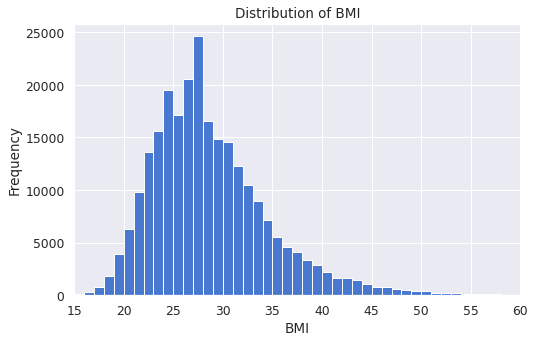

In [157]:
fig = plt.figure(figsize=(8,5))
bins = np.arange(diabetes_df.BMI.min(), diabetes_df.BMI.max()+1, 1)
plt.hist(data=diabetes_df, x='BMI', bins=bins);
plt.xlim(15, 60);
plt.xlabel('BMI');
plt.ylabel('Frequency');
plt.title('Distribution of BMI');

## Frequencies of BMI Categories
It is alarming that the majority of the population covered in the survey is overweight, and the next highest occuring class is that of Obese. People who are of Healthy Weight are less than those who are Overweight and Obese. The number of Extremely Obese persons is also higher than of Underweight persons.


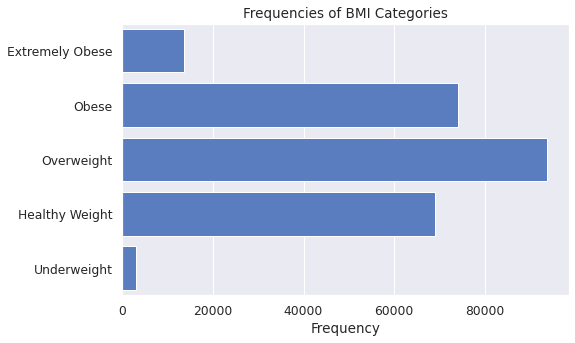

In [158]:
default_color = sns.color_palette()[0]  # set a default color to avoid rainbos-colored plots

fig=plt.figure(figsize=(8,5))
sns.countplot(data=diabetes_df, y='BMICategory', color=default_color, orient='h', order = [5,4,3,2,1]);

plt.yticks(ticks = np.arange(5), labels=bmi_encodings[::-1]);
plt.xlabel('Frequency');
plt.ylabel('');
plt.title('Frequencies of BMI Categories');

Turning now to the target variable, Diabetes
## Comparing Diabetes with BMI
There is an increased risk of Diabetes with increasing average BMI values. As the BMI class increases, the average BMI associated with the BMI class increases also.

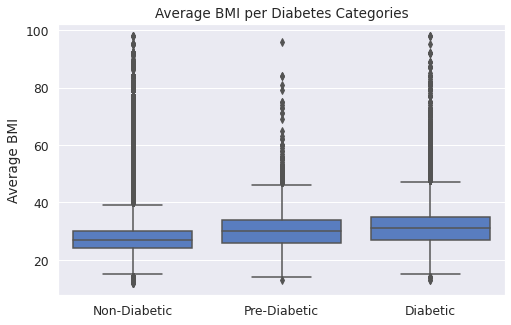

In [159]:
fig = plt.figure(figsize=(8,5))
sns.boxplot(data=diabetes_df, x='Diabetes_012', y='BMI', color=default_color);
plt.xlabel('');
plt.xticks(ticks=np.arange(3), labels=diab_encodings)
plt.ylabel('Average BMI');
plt.title('Average BMI per Diabetes Categories');


## Which gender is more likely to have Diabetes?
It appears that males are more likely to have Diabetes than females. At the Diabetic point, males have the higher frequency, however more females are prediabetic and non-diabetic.

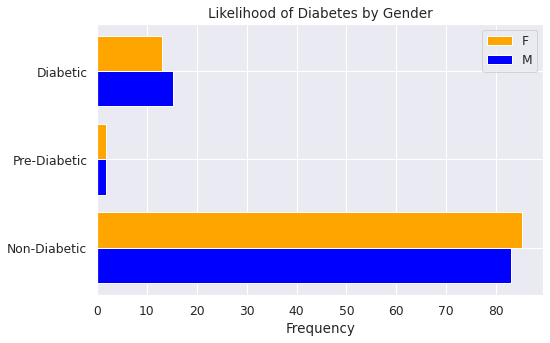

In [160]:
def get_prop(sex, diab_class):
    """This function calculates the proportion of a particular sex
    that falls into a given diabetes classification"""

    return round((len(diabetes_df.Sex[(diabetes_df.Sex==sex) & (diabetes_df.Diabetes_012==diab_class)]) / \
    len(diabetes_df.Sex[diabetes_df.Sex==sex])) * 100, 2)


# build two dictionaries to hold each proportion for each gender.
# This is necessary because of the visualization that will follow

female_props_dict = {}
male_props_dict = {}

prefixes = ['no_', 'pre_', '']
genders = ['female', 'male']
for i in range(3):  # loop runs three times, once for each diabetes class
    for j in range(2):  # loop runs twice, once for each sex
        if j==0:
            female_props_dict[f'{prefixes[i]}diab_{genders[j]}_prop'] = get_prop(j, i)
        else:
            male_props_dict[f'{prefixes[i]}diab_{genders[j]}_prop'] = get_prop(j, i)


fig = plt.figure(figsize=(8,5))
y=np.arange(len(female_props_dict))

plt.barh(y=y+0.2, height=0.4, width=female_props_dict.values(), color='orange');
plt.barh(y=y-0.2, height=0.4, width=male_props_dict.values(), color='blue');

plt.yticks(y, diab_encodings);
plt.legend(sex_encodings);
plt.xlabel('Frequency');
plt.title('Likelihood of Diabetes by Gender');

## Diabetes and Age
When comparing diabetes across ages, it can be seen that the risk of diabetes increases with increasing age, and then decreases again at the advanced ages

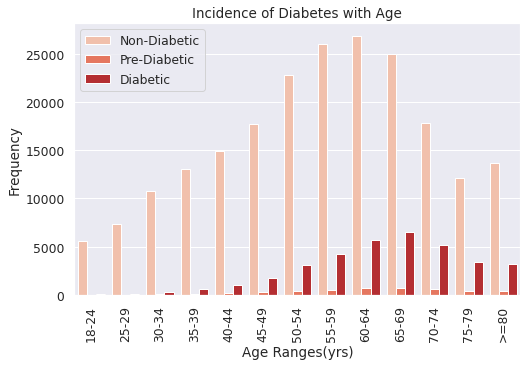

In [161]:
fig = plt.figure(figsize=(8,5))
sns.countplot(data=diabetes_df, x='Age', hue='Diabetes_012', palette='Reds');

plt.xticks(ticks=np.arange(13), labels=age_encodings, rotation=90);
plt.xlabel('Age Ranges(yrs)')
plt.ylabel('Frequency');
plt.title('Incidence of Diabetes with Age');
plt.legend(diab_encodings);

## Diabetes in relation to both BMI and Age

BMI is consistently lower for non-diabetics across all the ages. As BMI increases, chances of Diabetes also increase, and this in turn increases with age such that, at the advanced ages, even lower BMI values have a significant chance of turning out diabetic.

The distribution shadows along the lines also shows that more of the younger persons tend to fall in the Pre-Diabetic and Diabetic Categories

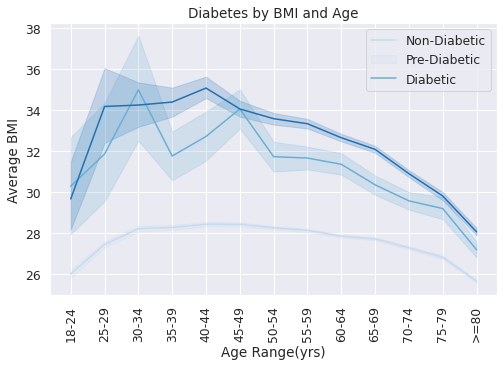

In [162]:
fig = plt.figure(figsize=(8,5))
g=sns.lineplot(data=diabetes_df, y='BMI', x='Age', hue='Diabetes_012', palette='Blues');

plt.xticks(ticks=np.arange(1,14), labels=age_encodings, rotation=90);
plt.xlabel("Age Range(yrs)");
plt.ylabel("Average BMI");
plt.title("Diabetes by BMI and Age");
plt.legend(diab_encodings);

for t,l in zip(g.legend_.texts, diab_encodings):
    t.set_text(l)

## Diabetes in relation to BMI and Sex


For both genders, diabetes risk increases with average BMI, and the aveage BMI increases according to the BMI class.

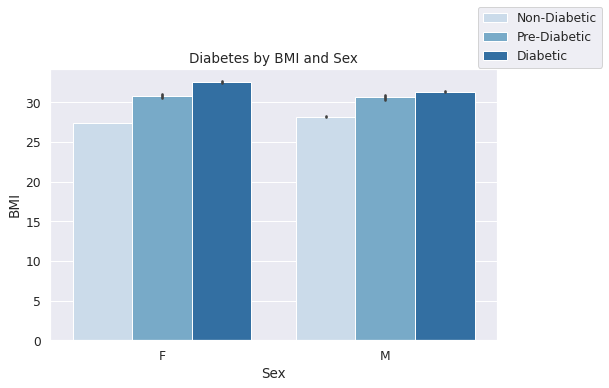

In [163]:
fig = plt.figure(figsize=(8,5))
g=sns.barplot(data=diabetes_df, x='Sex', y='BMI', hue='Diabetes_012', palette='Blues');

plt.xticks(ticks=np.arange(2), labels=sex_encodings);
plt.xlabel('Sex');
plt.ylabel('BMI');
plt.title('Diabetes by BMI and Sex');
plt.legend(bbox_to_anchor=(1.25,1.25))
for t,l in zip(g.legend_.texts, diab_encodings):
    t.set_text(l)

## Diabetes by Age and Sex
Average BMI for males is higher than for females of the same age group, and this is consistent across all ages. Both lines follow a similar trend, increasing up to the late froties, then declining.

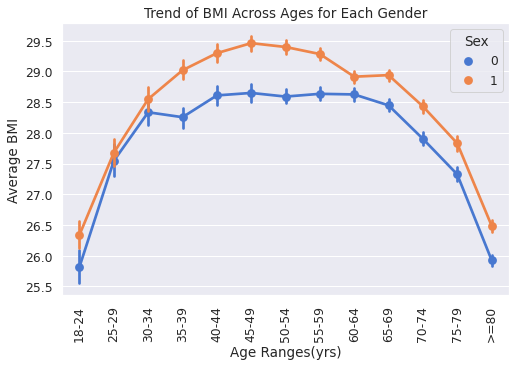

In [164]:
fig= plt.figure(figsize=(8,5))

g = sns.pointplot(data=diabetes_df, y='BMI', x='Age', hue='Sex');

plt.xticks(ticks=np.arange(13), labels=age_encodings, rotation=90);
plt.xlabel('Age Ranges(yrs)');
plt.ylabel('Average BMI');
plt.title('Trend of BMI Across Ages for Each Gender');

## Putting them all together
This considers all four variables together, comparing BMI, Age and Sex for each Diabetes class. The following can be observed:
- For non-diabetics, the BMI of the males is consistently higher than that of the females.
- For prediabetics, average BMI is about the same, except for a huge spike in BMI's of females at about age category 3. This is the category for ages 25-29, and perhaps this jarring spike in BMI's can be traced to pregnancy and childbirth, suggesting some effects of gestational diabetes?
- In the diabetic plot column, the trend is reversed compared with non-diabetic. Here, diabetic women have consistently higher BMI's than diabetic men.

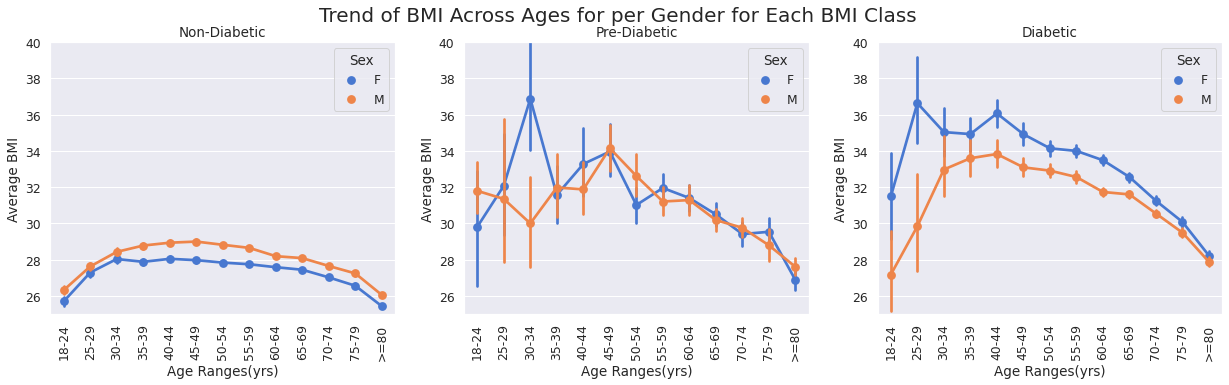

In [166]:
# this method is adopted because passing hue and col into Seaborn,
# though would plot it correctly, would not give the correct labels

def plot(x,y,z, count):
    """Function to draw 3D pointplot"""
    g=sns.pointplot(x, y, hue=z);

    plt.xticks(ticks=np.arange(13), labels=age_encodings, rotation=90);
    plt.xlabel('Age Ranges(yrs)');
    plt.ylabel('Average BMI');
    plt.ylim(25,40)

    if count == 0:
        plt.title('Non-Diabetic')
    elif count==1:
        plt.title('Pre-Diabetic')
    elif count==2:
        plt.title('Diabetic')

    for t, l in zip(g.legend_.texts, sex_encodings):
        t.set_text(l)

fig = plt.figure(figsize=(21,5))
fig.suptitle('Trend of BMI Across Ages for per Gender for Each BMI Class', fontsize=20);
for i in range(3):
    data = diabetes_df[diabetes_df.Diabetes_012==i]
    ax=fig.add_subplot(1,3,i+1)
    ax = plot(data.Age, data.BMI, data.Sex, i)

In [2]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --template output-toggle.tpl --post serve

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
Traceback (most recent call last):
  File "/home/me/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/home/me/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/me/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/home/me/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/home/me/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/home/me/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", li